In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
plt.rcParams['figure.figsize'] = 8, 6

In [9]:
mnist = pd.read_csv('data/mnist_to_pendigits.csv')
mnist.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,50,69,37,56,27,39,32,22,54,24,65,39,68,57,63,76,0
1,41,73,28,55,25,33,37,20,55,26,70,43,75,66,60,81,0
2,54,71,39,60,27,45,26,26,46,25,63,35,69,54,71,76,0
3,44,70,32,54,26,35,38,21,58,26,69,44,70,65,59,79,0
4,38,76,31,57,28,40,37,23,59,23,74,38,72,57,58,73,0


In [139]:
Xtest = mnist.drop('label', axis=1)
ytest = mnist.label

In [11]:
with open('svm.pkl', 'rb') as f:
    svm = pickle.load(f)
with open('tree.pkl', 'rb') as f:
    tree = pickle.load(f)
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)

In [13]:
print('SVM accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN accuracy: {}'.format(knn.score(Xtest, ytest)))

SVM accuracy: 0.398
Decision Tree accuracy: 0.184
KNN accuracy: 0.616


SVC
              precision    recall  f1-score   support

           0       0.31      0.72      0.43        50
           1       0.25      0.52      0.33        50
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        50
           4       0.86      0.48      0.62        50
           5       0.28      0.82      0.42        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        50
           8       0.64      0.78      0.70        50
           9       0.94      0.66      0.78        50

   micro avg       0.40      0.40      0.40       500
   macro avg       0.33      0.40      0.33       500
weighted avg       0.33      0.40      0.33       500



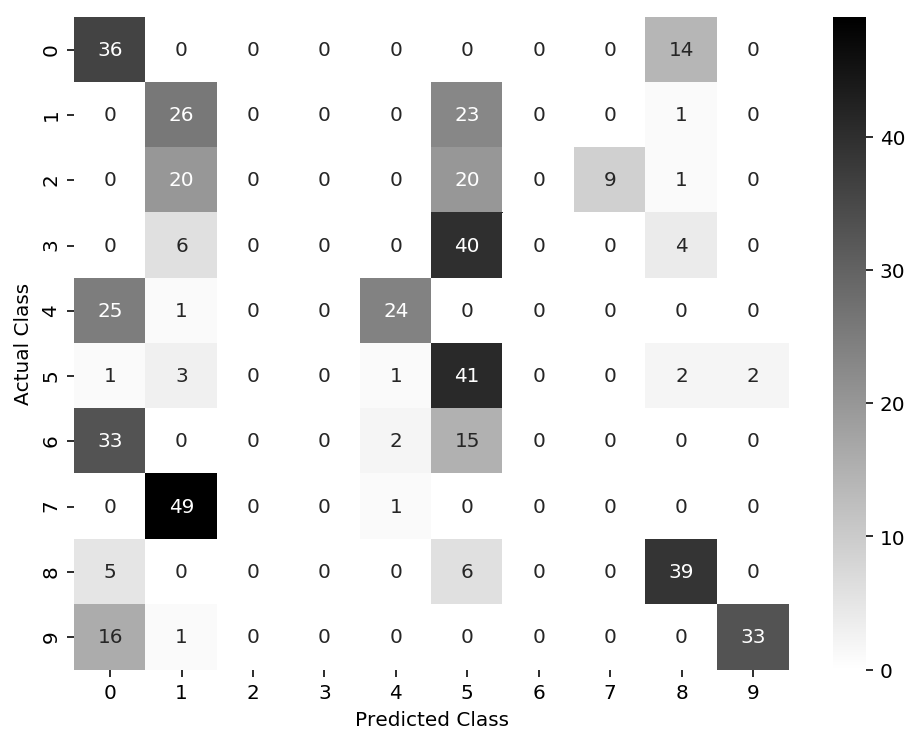

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.24      0.34      0.28        50
           1       0.00      0.00      0.00        50
           2       0.06      0.12      0.08        50
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        50
           5       1.00      0.02      0.04        50
           6       0.00      0.00      0.00        50
           7       0.05      0.04      0.04        50
           8       0.39      0.76      0.52        50
           9       0.20      0.56      0.29        50

   micro avg       0.18      0.18      0.18       500
   macro avg       0.19      0.18      0.12       500
weighted avg       0.19      0.18      0.12       500



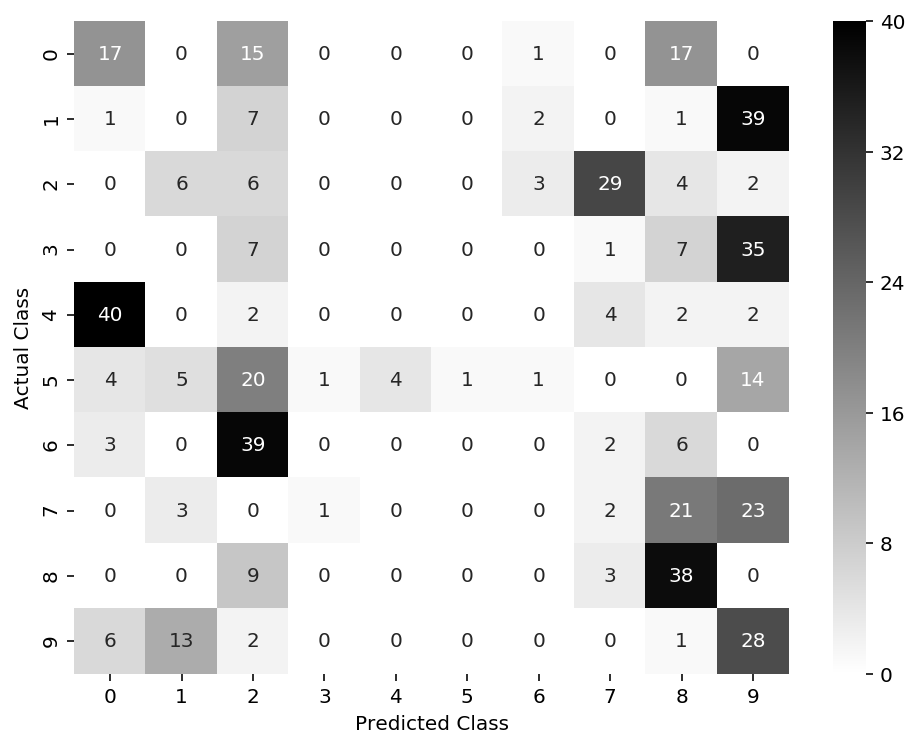

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.32      0.42      0.36        50
           2       0.83      0.48      0.61        50
           3       0.88      0.84      0.86        50
           4       0.45      1.00      0.62        50
           5       0.45      0.58      0.50        50
           6       0.73      0.16      0.26        50
           7       0.12      0.08      0.10        50
           8       0.97      0.62      0.76        50
           9       0.91      1.00      0.95        50

   micro avg       0.62      0.62      0.62       500
   macro avg       0.66      0.62      0.60       500
weighted avg       0.66      0.62      0.60       500



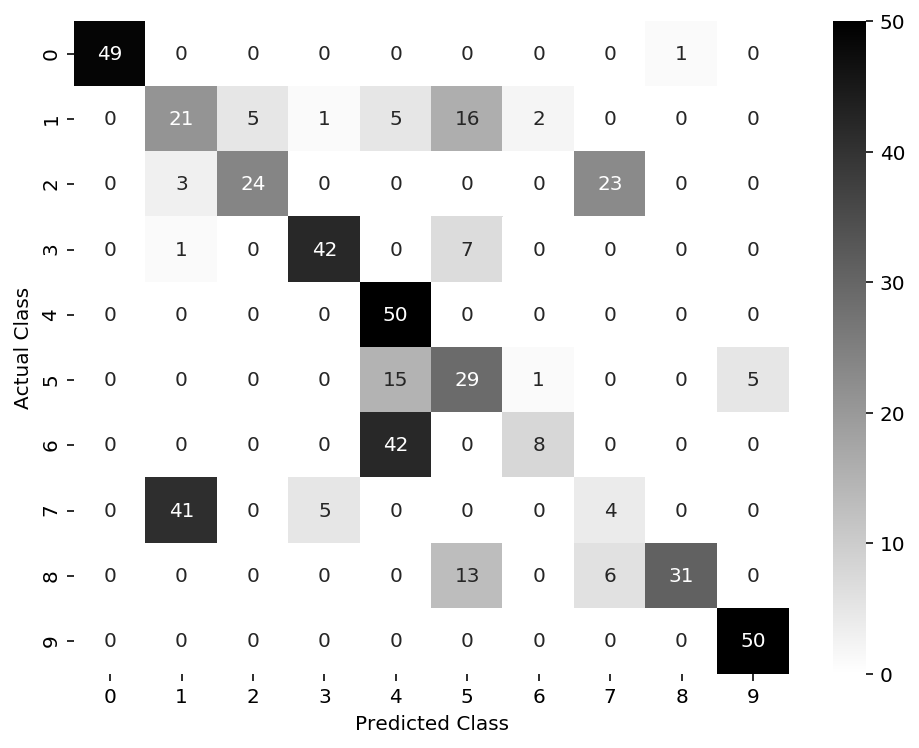

In [22]:
for model in [svm,tree,knn]:
    y_pred = model.predict(Xtest)
    print(model.__class__.__name__)
    print(classification_report(ytest, y_pred))
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

KNN


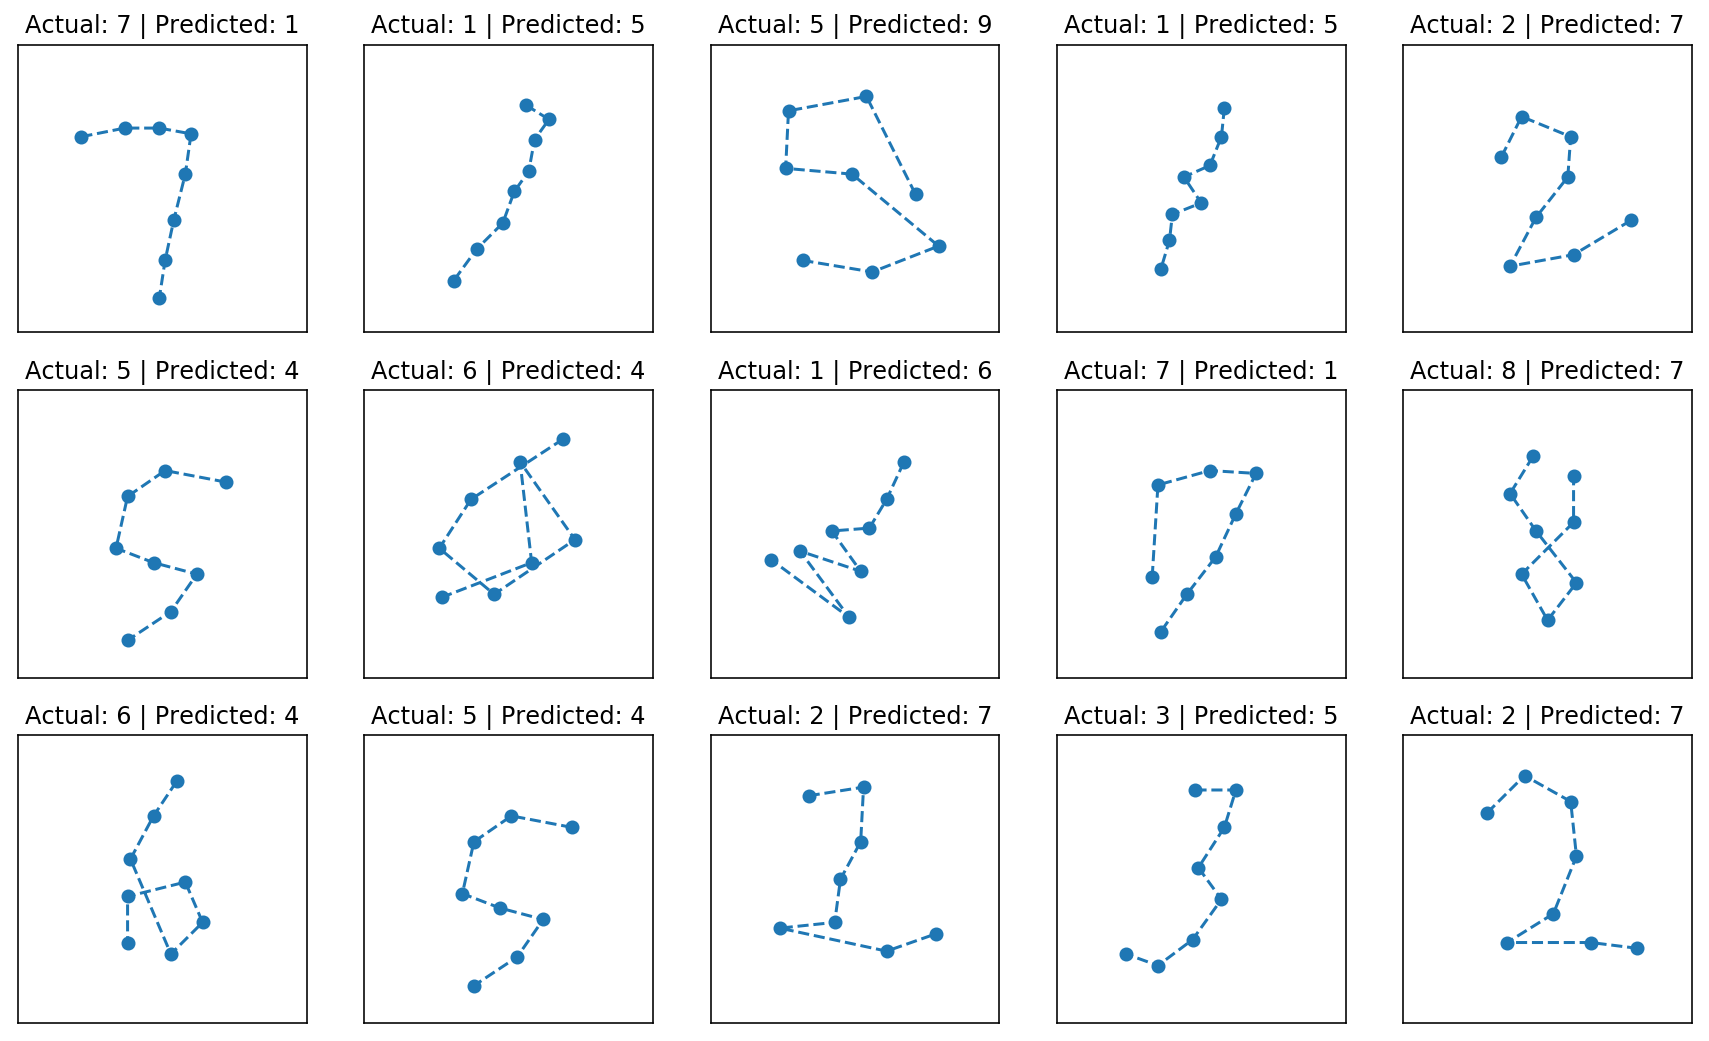

Decision Tree


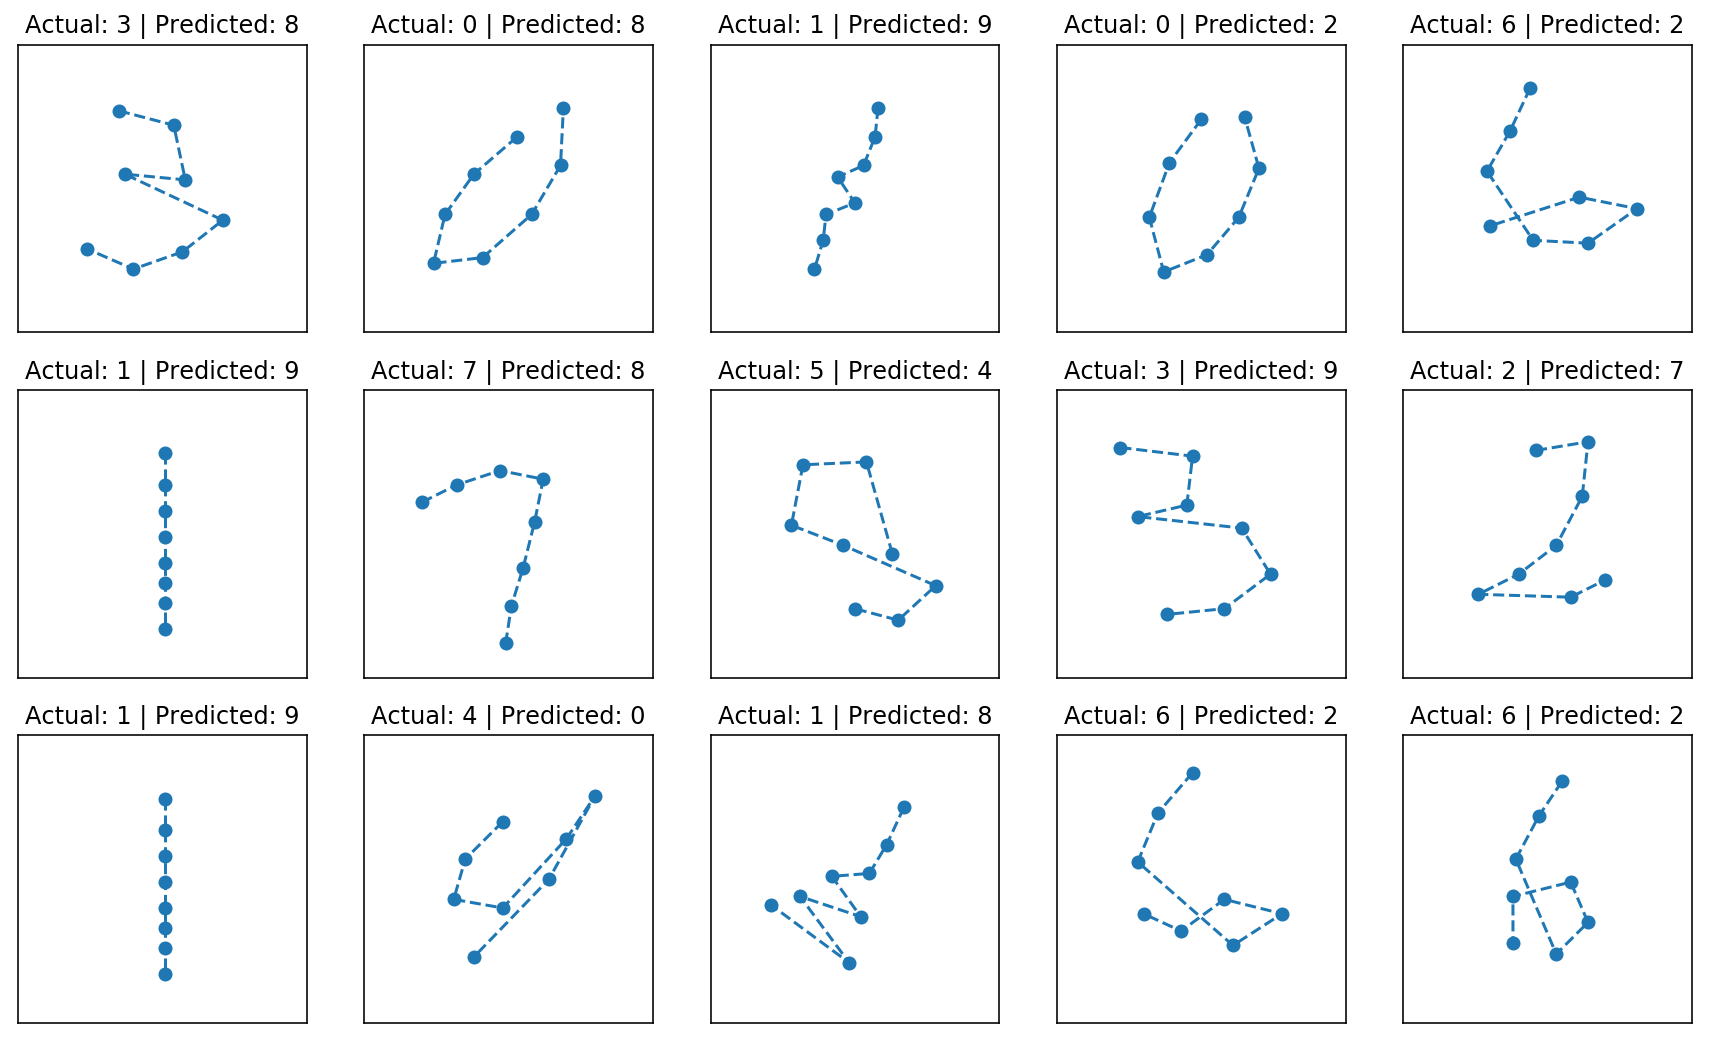

SVM


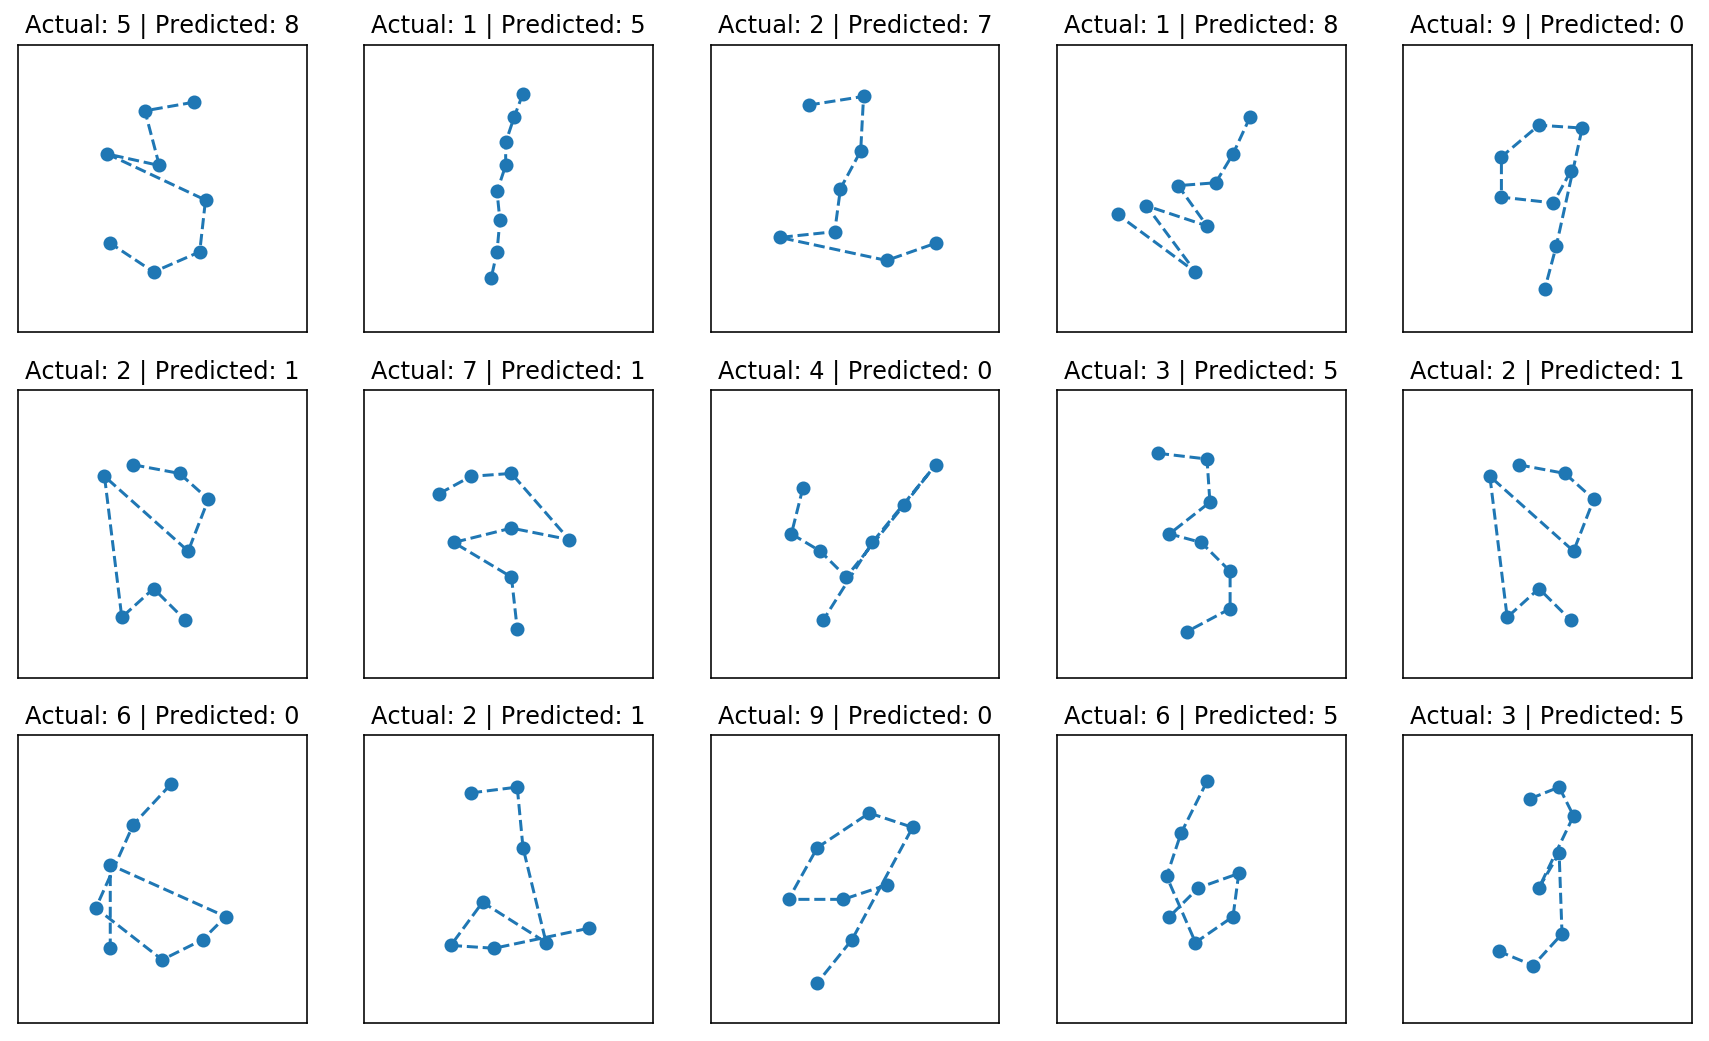

In [24]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    r, c = 3,5
    samples = np.random.choice(misclassified, r*c)
    fig = plt.figure(figsize=(15,9))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)
    plt.show()

In [26]:
mnist.groupby('label').max()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
label,,,,,,,,,,,,,,,,
0,57,82,47,67,35,47,50,29,73,35,82,52,80,72,71,82
1,76,85,67,77,62,71,58,62,54,52,52,50,56,36,54,41
2,54,89,74,86,76,78,72,61,52,72,48,41,66,43,87,47
3,54,84,72,83,77,79,55,63,73,63,78,46,63,27,47,51
4,68,80,53,67,46,56,62,51,79,66,85,80,90,52,72,37
5,84,83,71,82,55,77,48,68,68,70,79,60,66,35,50,39
6,69,87,55,80,44,65,62,35,81,48,81,79,66,62,46,44
7,42,78,55,78,68,75,81,76,76,62,69,47,59,46,64,27
8,65,80,52,69,74,58,71,35,55,34,55,57,78,69,83,83


In [278]:
Xtest = mnist.drop('label', axis=1)
ytest = mnist.label

In [279]:
def get_boundary(coord):
    xmin = coord[:,0].min()
    xmax = coord[:,0].max()
    ymin = coord[:,1].min()
    ymax = coord[:,1].max()
    return xmin,ymin,xmax,ymax

def scale(coord):
    coord=coord*1.0
    xmin,ymin,xmax,ymax = get_boundary(coord)
    x_o = (xmax - xmin)/2
    y_o = (ymax - ymin)/2
    coord[:,0] -= xmin+x_o
    coord[:,1] -= ymin+y_o
    sc = 50/max(x_o, y_o)
    coord *= sc
    coord[:,0] += xmin+x_o
    coord[:,1] += ymin+y_o
    coord[coord<0]=0
    coord[coord>100]=100
    return coord.astype('int64')

def plot_exfeatures(coord):
    plt.plot(coord[:,0],coord[:,1], '--o')

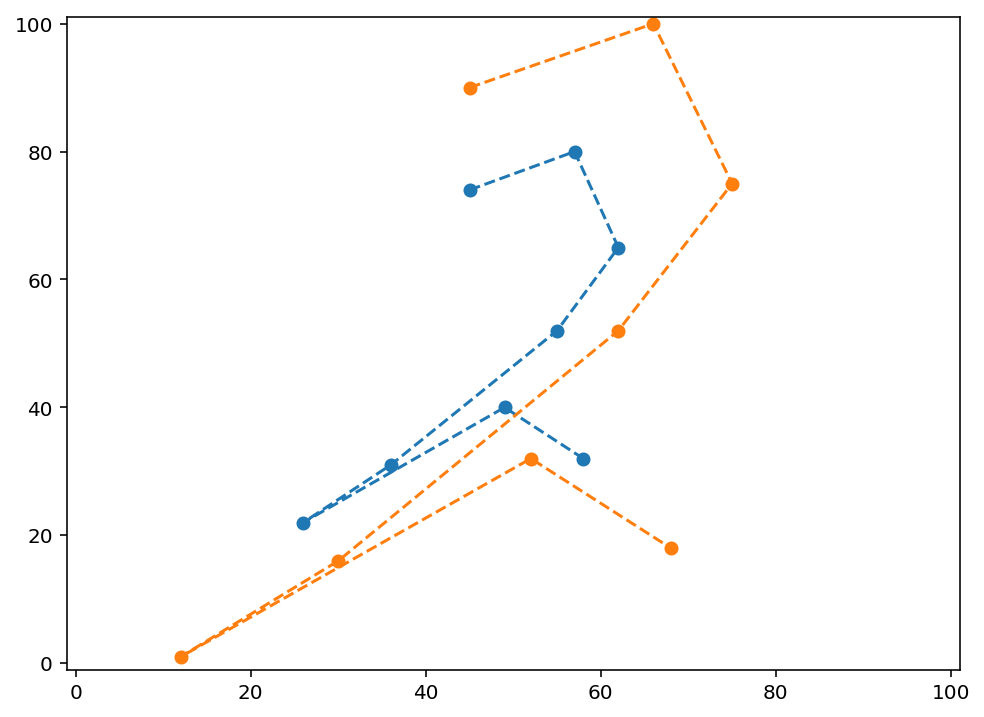

In [280]:
plot_exfeatures(Xtest.iloc[102].values.reshape((8,2)))
plt.xlim((-1,101))
plt.ylim((-1,101))
# plt.show()
plot_exfeatures(scale(Xtest.iloc[102].values.reshape((8,2))))
# plt.xlim((-50,50))
# plt.ylim((-50,50))
plt.show()

In [270]:
for i in range(len(Xtest)):
    Xtest.loc[i]=scale(Xtest.loc[i].values.reshape((8,2))).ravel()

In [272]:
print('SVM accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN accuracy: {}'.format(knn.score(Xtest, ytest)))

SVM accuracy: 0.722
Decision Tree accuracy: 0.494
KNN accuracy: 0.766


SVC
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        50
           1       0.42      0.90      0.58        50
           2       1.00      0.54      0.70        50
           3       0.85      0.80      0.82        50
           4       0.68      0.92      0.78        50
           5       0.78      0.72      0.75        50
           6       0.88      0.46      0.61        50
           7       0.25      0.10      0.14        50
           8       0.96      0.88      0.92        50
           9       0.92      0.94      0.93        50

   micro avg       0.72      0.72      0.72       500
   macro avg       0.75      0.72      0.71       500
weighted avg       0.75      0.72      0.71       500



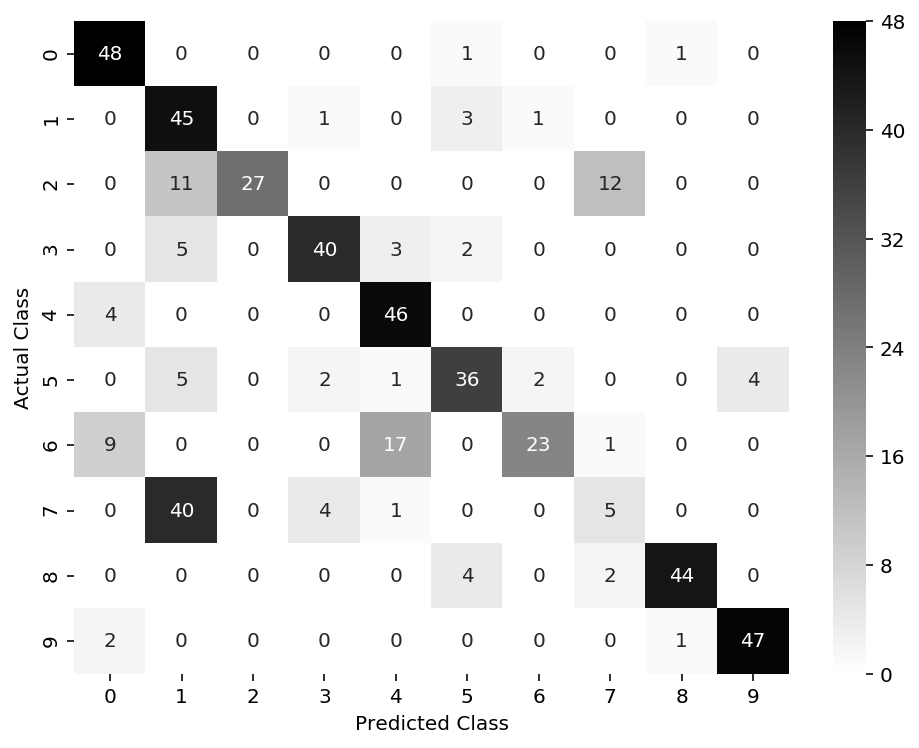

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.44      0.82      0.57        50
           1       0.18      0.14      0.16        50
           2       0.78      0.62      0.69        50
           3       0.59      0.66      0.62        50
           4       0.55      0.84      0.67        50
           5       0.96      0.52      0.68        50
           6       0.38      0.36      0.37        50
           7       0.48      0.20      0.28        50
           8       0.68      0.42      0.52        50
           9       0.26      0.36      0.30        50

   micro avg       0.49      0.49      0.49       500
   macro avg       0.53      0.49      0.49       500
weighted avg       0.53      0.49      0.49       500



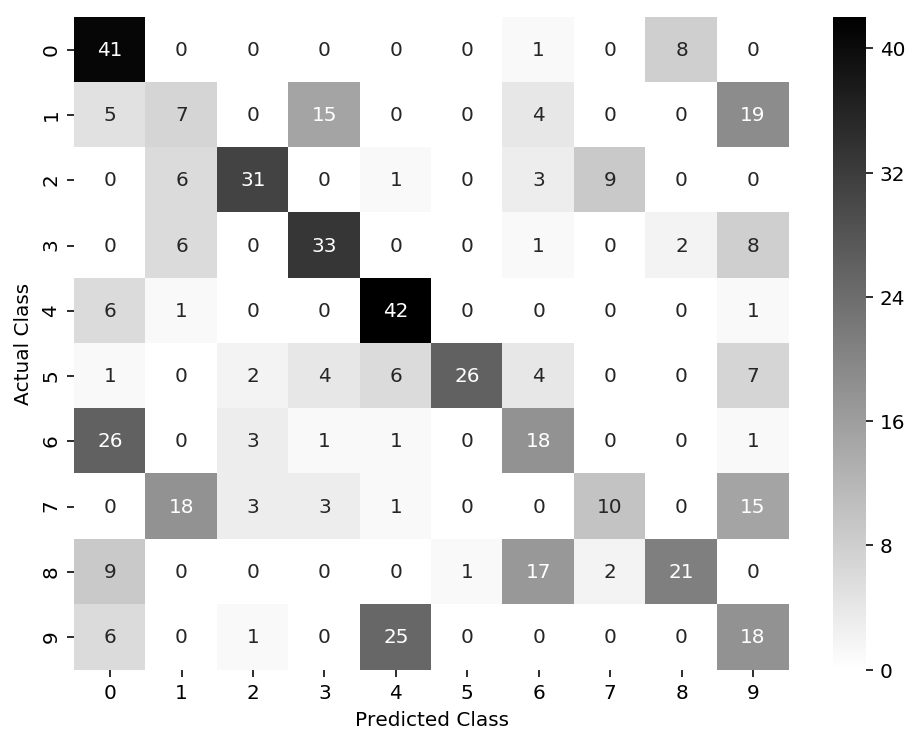

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.55      0.52      0.54        50
           2       0.77      0.94      0.85        50
           3       0.81      0.88      0.85        50
           4       0.62      1.00      0.77        50
           5       0.58      0.84      0.68        50
           6       0.91      0.42      0.58        50
           7       0.84      0.32      0.46        50
           8       1.00      0.74      0.85        50
           9       0.93      1.00      0.96        50

   micro avg       0.77      0.77      0.77       500
   macro avg       0.80      0.77      0.75       500
weighted avg       0.80      0.77      0.75       500



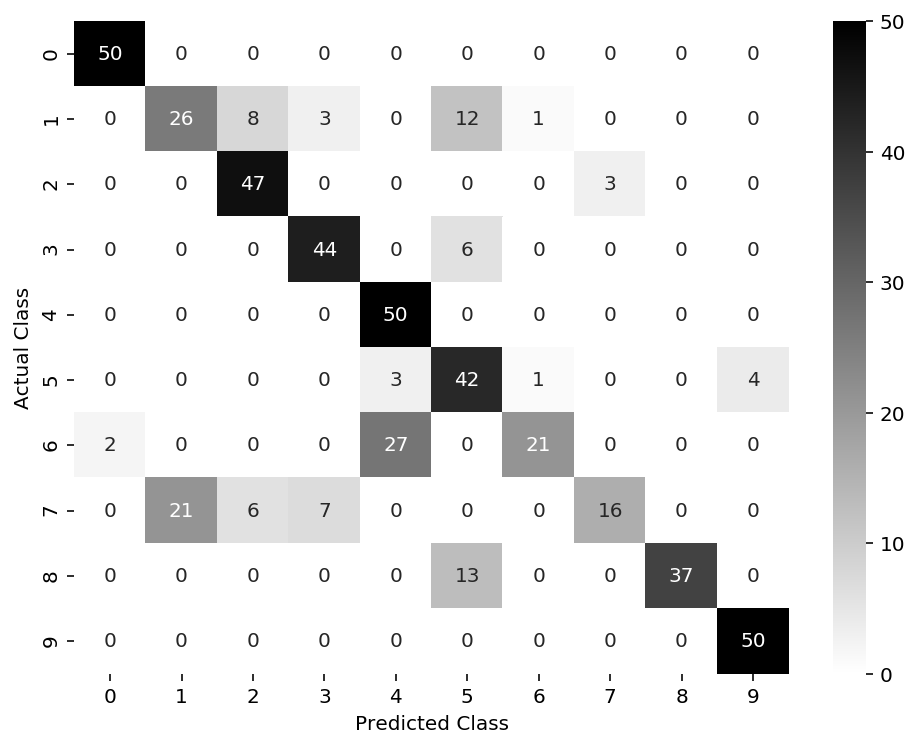

In [273]:
for model in [svm,tree,knn]:
    y_pred = model.predict(Xtest)
    print(model.__class__.__name__)
    print(classification_report(ytest, y_pred))
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

KNN


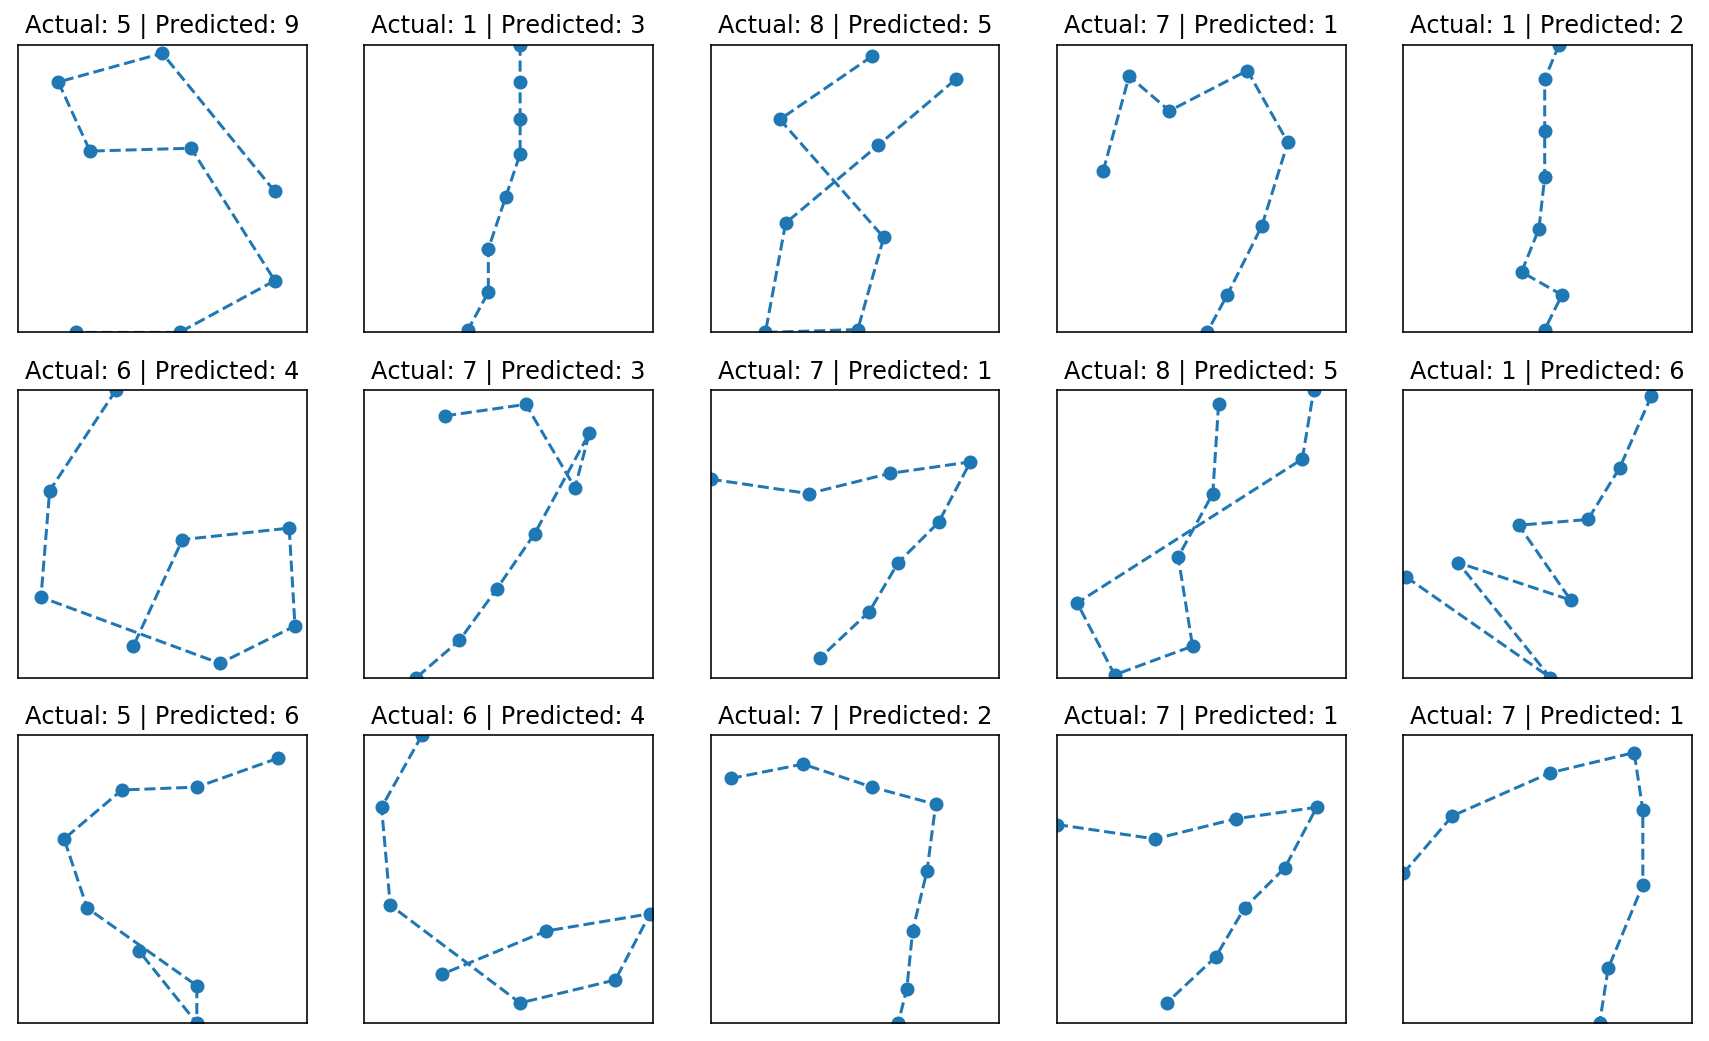

Decision Tree


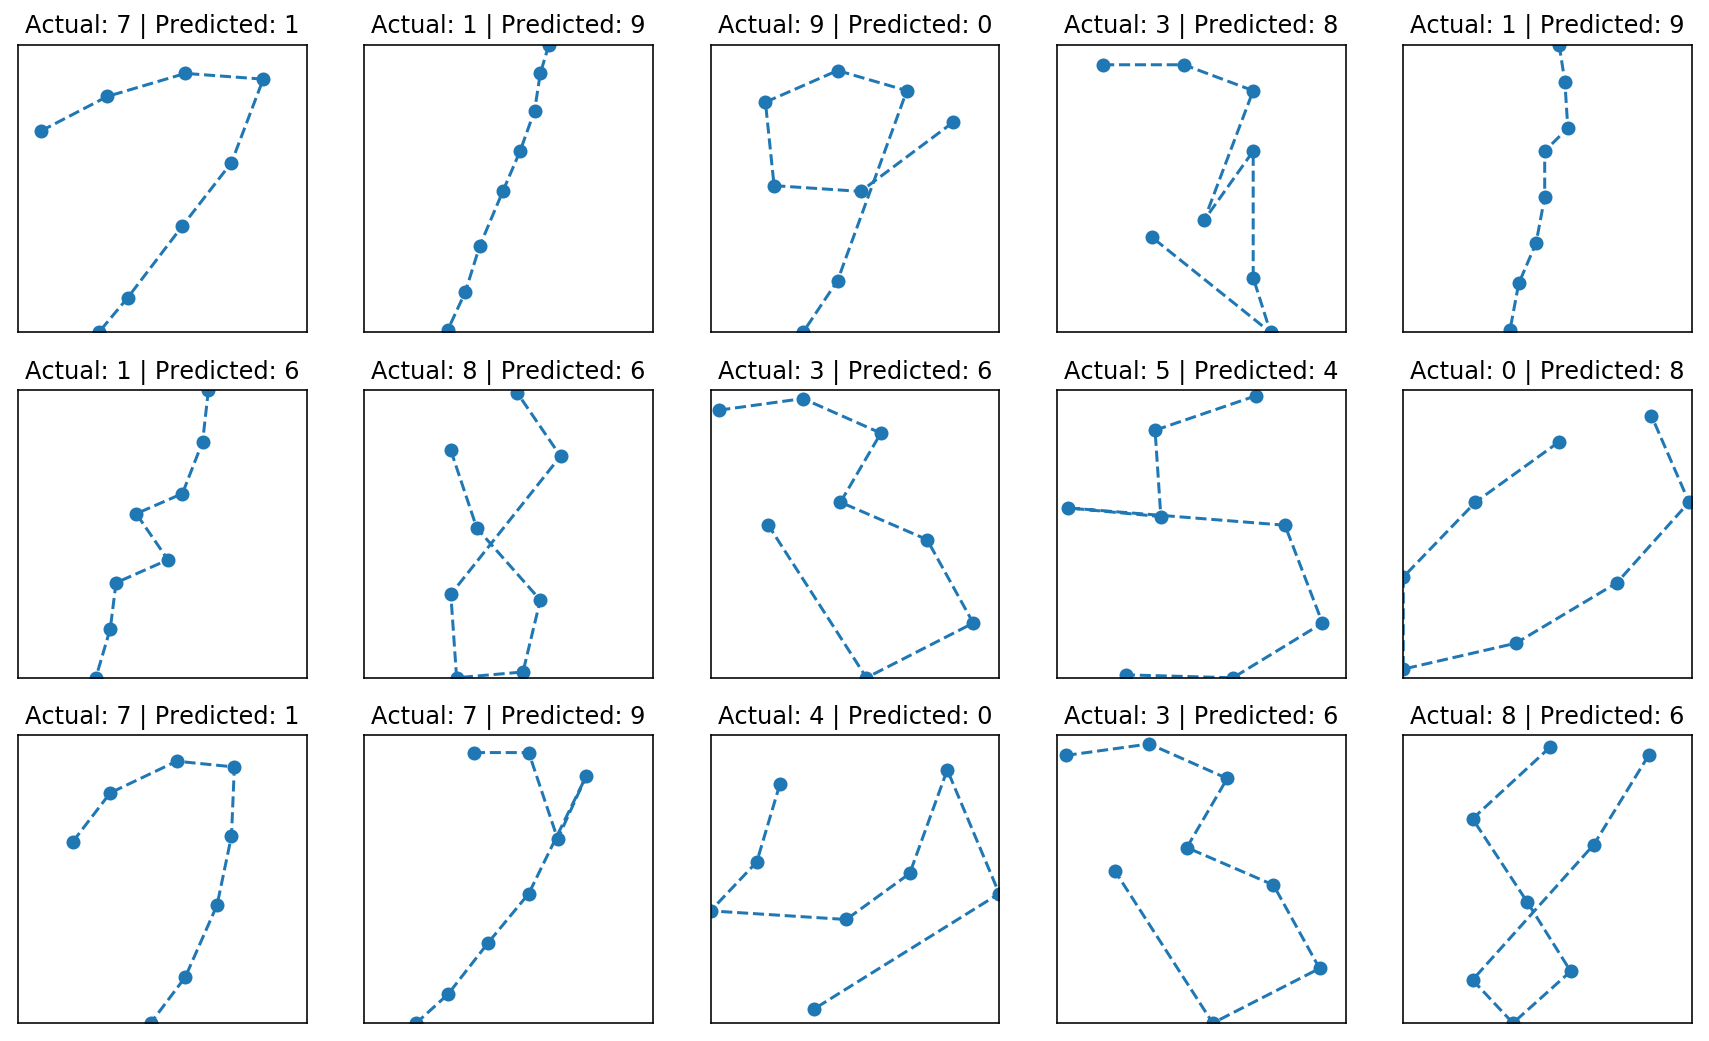

SVM


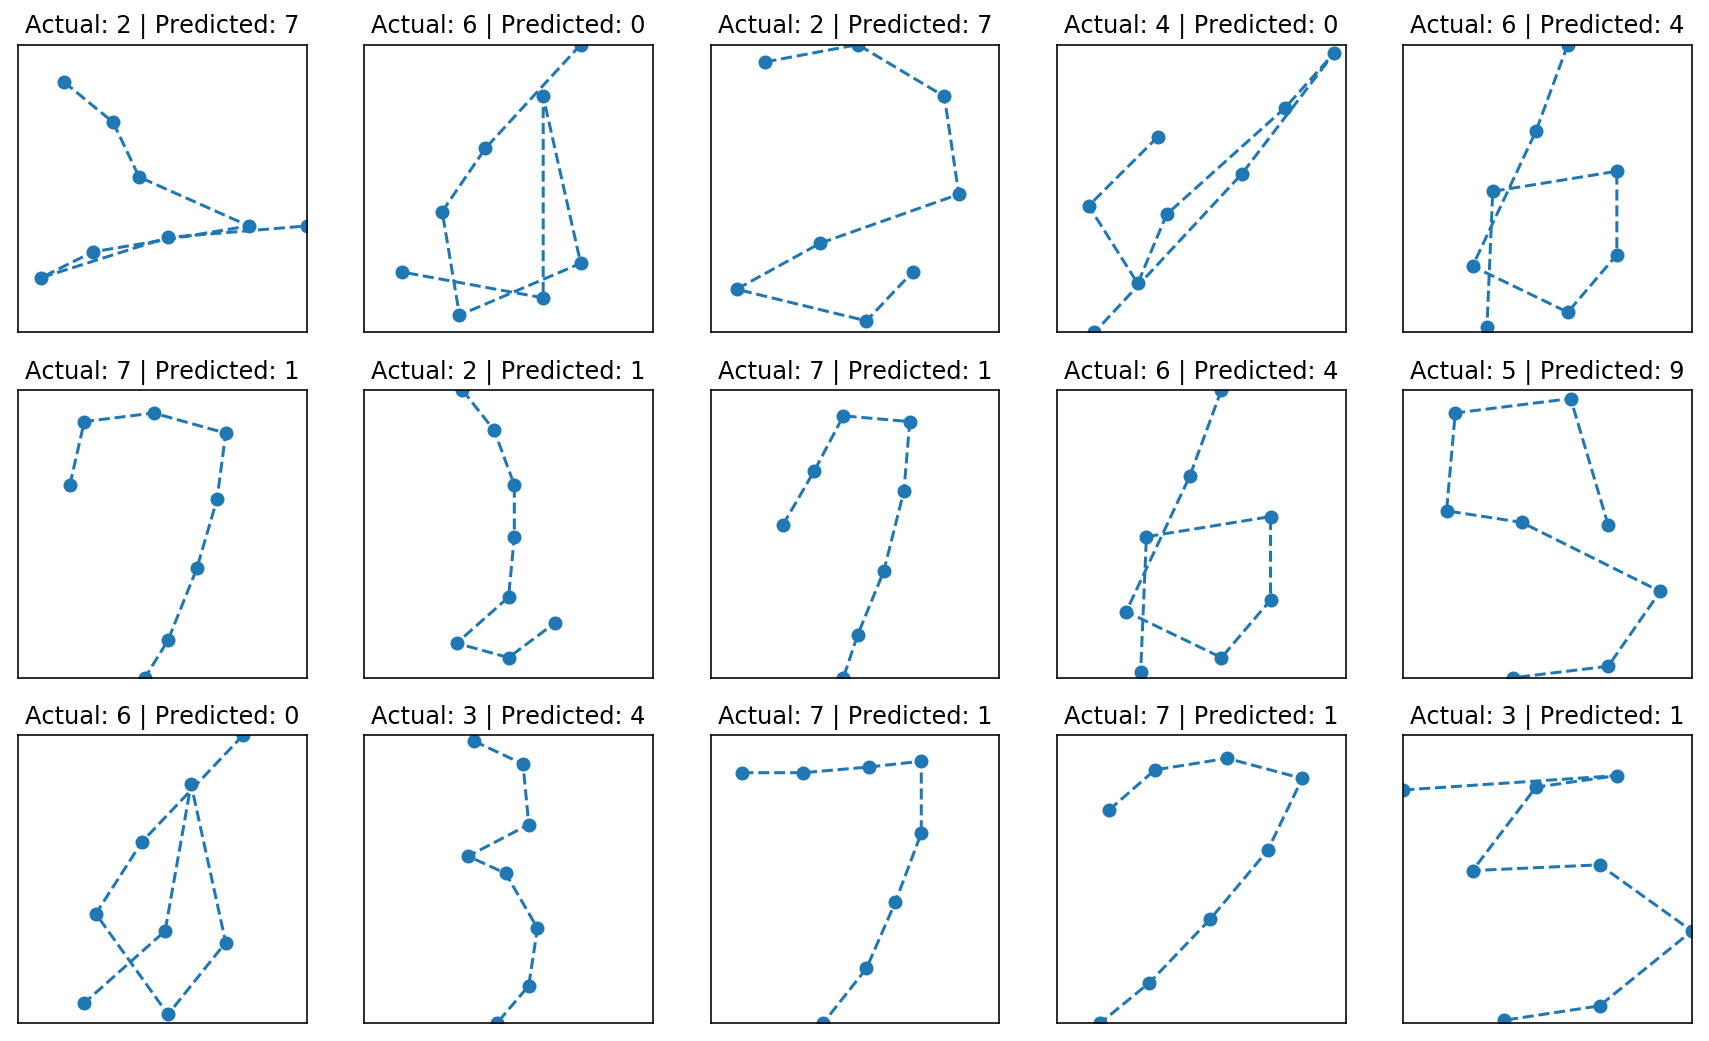

In [274]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    r, c = 3,5
    samples = np.random.choice(misclassified, r*c)
    fig = plt.figure(figsize=(15,9))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)
    plt.show()